## Objective
Investigate why majority of prop. detections when model inputs are used result in units that have more than 1% ISI violations

## Log
2/27/23 - Created notebook

In [39]:
%load_ext autoreload
%autoreload
import setup_notebook

import numpy as np
import matplotlib.pyplot as plt
from src.sorters import PropSignal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# Load prop signal
prop_signals = PropSignal("/data/MEAprojects/DLSpikeSorter/models/v0_4_4/2950/230101_133131_959516/log/prop_signal/default", elec_idx=-1)

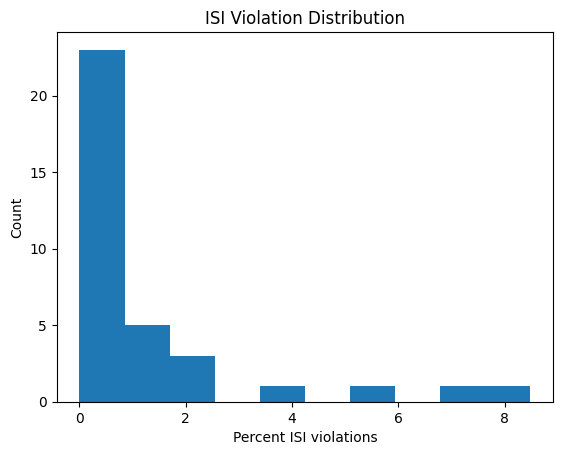

In [28]:
## Plot ISI distribution
viols = prop_signals.plot_isis()

In [ ]:
# Look at units with highest percentages
from IPython.display import display
for idx in np.argsort(viols)[::-1]:
    display(prop_signals[idx].df)

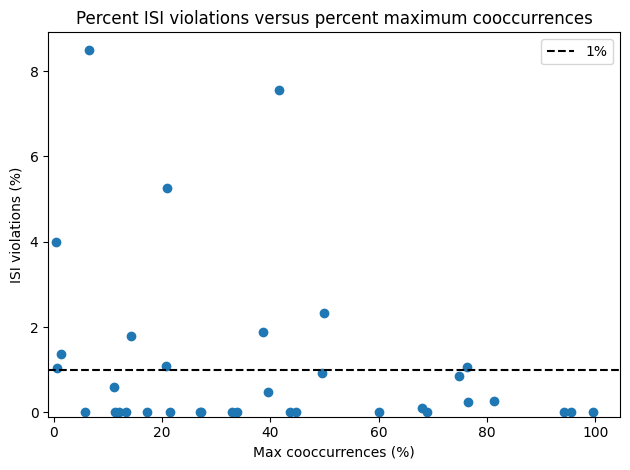

In [48]:
## Plot ISI violation percent as function of max percent cooccurrences
cooccurrences = []
for unit in prop_signals:
    cos = np.sort(unit.df.small_window_cooccurrences)
    cooccurrences.append(cos[-2]/cos[-1] * 100)

plt.title("Percent ISI violations versus percent maximum cooccurrences")
plt.ylabel("ISI violations (%)")
plt.xlabel("Max cooccurrences (%)")
plt.scatter(cooccurrences, viols)
plt.axhline(1, label="1%", c="black", linestyle="dashed")
plt.xlim(-1)
plt.ylim(-0.1)
plt.legend()
plt.tight_layout()
plt.show()